## 1) Loading dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("D:/offical/Kartik/Machine Learning/PCA/dataset_60_waveform-5000.csv")

df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x32,x33,x34,x35,x36,x37,x38,x39,x40,class
0,-0.23,-1.21,1.20,1.23,-0.10,0.12,2.49,1.19,1.34,0.58,...,-0.86,-0.70,0.51,0.34,-0.13,-0.87,0.56,-0.53,0.29,2
1,0.38,0.38,-0.31,-0.09,1.52,1.35,1.49,3.81,2.33,1.34,...,1.28,1.40,0.00,-0.18,0.71,0.04,0.91,-0.79,0.22,0
2,-0.69,1.00,1.08,1.48,2.44,3.39,3.09,4.08,5.48,3.61,...,0.29,1.12,0.60,0.28,2.17,0.18,-0.09,-1.33,1.00,1
3,0.40,0.68,0.27,1.39,1.03,-0.32,-1.23,-0.50,0.11,0.87,...,0.43,-0.30,-0.07,-0.99,-0.75,1.11,1.35,-1.63,0.10,0
4,-0.81,1.59,-0.69,1.16,4.22,4.98,4.52,2.54,5.60,4.66,...,0.62,0.14,1.33,-1.87,1.48,-0.02,-0.58,0.93,0.40,1


In [28]:
df.shape

(5000, 41)

There are 5000 instances and 40 features + 1 target feature having 3 classes (0,1,2

## 2) Sorting the Dataset

In [3]:
#Independent Features
X = df.drop(["class"], axis = 1)
print(X.shape)

#Target
y = df["class"]
print(y.shape)

(5000, 40)
(5000,)


In [4]:
feat_names = X.columns
print(feat_names)

target_names = ["class_0", "class_1", "class_2"]
print(target_names)

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40'],
      dtype='object')
['class_0', 'class_1', 'class_2']


Now, we have sorted the data into Independent and target feature. We can standardize the data (rescale the values to have Mean = 0 and Standard Deviation = 1) before applying PCA.

## 3) Applying Feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

## 4) Principal Component Analysis

In order to reduce the dimensions of the dataset, we have to specify the number of principal components.

We can think of principal components as coordinates that we want to project the data in.

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

Usually, we choose 2 or 3 components, but in most cases 2 is enough.

In [23]:
X_reduced = pca.fit_transform(X_scaled)

#### We can see, the dimensions have reduced from 40 to 2.

In [29]:
print("Shape of Original dataset {}".format(X.shape))
print("Shape of reduced dataset due to PCA {}".format(X_reduced.shape))

Shape of Original dataset (5000, 40)
Shape of reduced dataset due to PCA (5000, 2)


## 5) Visualization

As you can see in the below visualization of 2 PCA, the three classes are overalpping each other in a triangular pattern.

There wouldn't be any other way to scatterplot the entire dataset

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

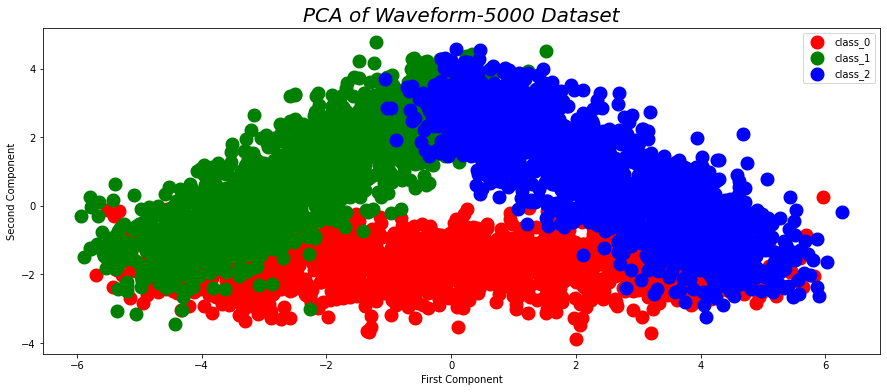

In [38]:
waveform = ["red","green","blue"]
wave_classes = [0,1,2]

plt.figure(figsize = (15,6))

for color, wave_class, target_name in zip(waveform, wave_classes, target_names):
    
    plt.scatter(X_reduced[y==wave_class,0], X_reduced[y==wave_class,1], c = color, linewidths = 8,
               label = target_name, cmap = 'jet')

plt.title("PCA of Waveform-5000 Dataset",fontsize=20,fontstyle='italic')
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.legend()